# Data importation and pre-processing on text data
We will use for this application archived cnn news articles. As any other work on data, we must at firs perform a pre-processing and in this particular case of text data , we need to clean the data as much as possible in order to get rid of any noise and stuff that will not be usefull. Natural language algorithms need as input clean that. Every step of the analysis wille be explain and details. We will reach the final output step by step without jump and hopefully we will understand as much as possible.

## Data importation ( archived cnn news articles)


### This cell will contain all the necessary packages

In [1]:
#import all the neccessary packages : 
!pip install wordcloud
!pip install spacy

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns # for plot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re, nltk  # for text cleaning
nltk.download("stopwords")
from nltk.corpus import stopwords
import spacy
from wordcloud import WordCloud  # to create wordcloud 
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
nltk.download('wordnet') # require for the tokenization
nltk.download('punkt') # require for the tokenization
nltk.download('omw-1.4')# require for lemmatization
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

[nltk_data] Downloading package stopwords to /Users/berichzinsou-
[nltk_data]     daho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package wordnet to /Users/berichzinsou-
[nltk_data]     daho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/berichzinsou-
[nltk_data]     daho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/berichzinsou-
[nltk_data]     daho/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Data importation
Cnn's archived news article fill available on kaggle

In [2]:
cnn_news = pd.read_csv("/Users/berichzinsou-daho/Documents/AMSE/MAG3/advanced_machine_learning/News_articles/CNN_Articels_clean.csv")

#Show first four line of the dafaframe
cnn_news.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


In [3]:
# have a look on the shape of our dataframe
cnn_news.shape

(37949, 11)

The dataframe is compound of 37949 article , with 11 feature on these available article.Obviously there some of these feature that are useless for us. Let's start the pre-processing in orderr to have a better idea/view



## Pre-processing

In [4]:
# we drop here the column that we think useless for our analysis
cnn_news = cnn_news.drop(["Author","Section","Category","Url","Keywords","Second headline"],axis=1) #use axis=1 drop on column
cnn_news.head()

,Index,Date published,Headline,Description,Article text
0,0,2021-07-15 02:46:59,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"(CNN)Right now, there's a shortage of truck d..."
1,1,2021-05-12 07:52:09,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,(CNN)Working in a factory or warehouse can me...
2,2,2021-06-16 02:51:30,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,2022-03-18 14:37:21,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,The pandemic thrust the working world into a n...
4,4,2022-03-19 11:41:08,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,New York (CNN Business)March Madness isn't jus...


In [5]:
# check whether there is missing values in the dataframe
cnn_news.isnull().sum()

Index             0
Date published    0
Headline          0
Description       0
Article text      9
dtype: int64

In [6]:
# drop line that have missing value
cnn_news = cnn_news.dropna()

In [7]:
# get info on the dataframe : available data ; their type; is their missing vamues etc.
cnn_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37940 entries, 0 to 37948
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           37940 non-null  int64 
 1   Date published  37940 non-null  object
 2   Headline        37940 non-null  object
 3   Description     37940 non-null  object
 4   Article text    37940 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


The Date published column that is about the date and the time a given article has been published had an object type. For our work we need that column to be a datetime type. So let convert it.

In [8]:
# convert the date colum into a date format
cnn_news["Date published"] = pd.to_datetime(cnn_news["Date published"])

# get only the date yyyy-mm-dd

cnn_news["Date"] = cnn_news["Date published"].dt.date

# Then get the corresponding time
cnn_news["time"] = cnn_news["Date published"].dt.time

# get only the years here
cnn_news["year"] = cnn_news["Date published"].dt.year

cnn_news.head()

,Index,Date published,Headline,Description,Article text,Date,time,year
0,0,2021-07-15 02:46:59,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"(CNN)Right now, there's a shortage of truck d...",2021-07-15,02:46:59,2021
1,1,2021-05-12 07:52:09,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,(CNN)Working in a factory or warehouse can me...,2021-05-12,07:52:09,2021
2,2,2021-06-16 02:51:30,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","(CNN)In a Hong Kong warehouse, a swarm of aut...",2021-06-16,02:51:30,2021
3,3,2022-03-18 14:37:21,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,The pandemic thrust the working world into a n...,2022-03-18,14:37:21,2022
4,4,2022-03-19 11:41:08,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,New York (CNN Business)March Madness isn't jus...,2022-03-19,11:41:08,2022


Let have a look on how many papers/articles are released per year. That is about see the distribution of the released paper per year. It will be usefull for us while getting the time series data. We will know on which years we should focus, in order to have a great database.

Text(0.5, 1.0, 'Frequency showing number of papers released in different years')

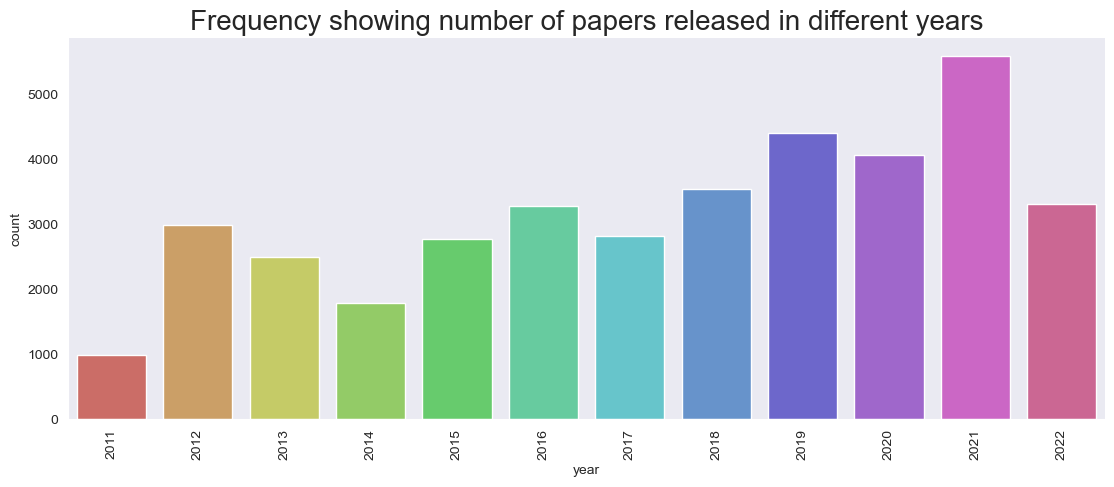

In [9]:
## plot distribution per year
sns.set_style("dark")
graph = sns.catplot(data=cnn_news, x="year", kind="count", height = 4.5, aspect = 2.5, palette = "hls")
graph.set_xticklabels(rotation=90)
plt.title("Frequency showing number of papers released in different years", size = 20)

We can also have a look on the distribution of words by paper

/var/folders/kk/hpd_zqw54y51xszlkdtdntxh0000gn/T/ipykernel_59503/1685035520.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cnn_news['Number_of_words'],kde = False,color="green", bins = 100)


Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

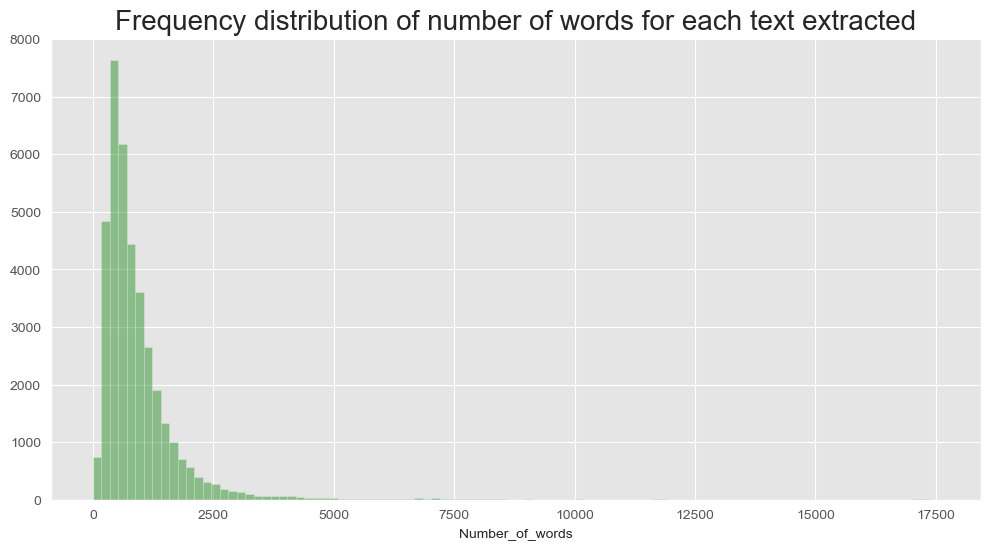

In [10]:
# get first a count on the number of words
cnn_news['Number_of_words'] = cnn_news['Article text'].apply(lambda x:len(str(x).split()))

#Plot a distribution
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(cnn_news['Number_of_words'],kde = False,color="green", bins = 100)
plt.title("Frequency distribution of number of words for each text extracted", size=20)


In [11]:
# get the class of the variable. actually here we just make sure that is about string
print(cnn_news["Article text"].apply(type).value_counts())


<class 'str'>    37940
Name: Article text, dtype: int64


## Clean up textual data

In [12]:
#define a function to remove all speccial character and 
def cleaned_text(text):
    clean = re.sub("\n"," ",text)
    clean=clean.lower()
    clean=re.sub(r"[~.',%/:;?_&+*=!-]"," ",clean)
    clean=re.sub("[^a-z]"," ",clean)
    clean=clean.lstrip()
    clean=re.sub("\s{2,}"," ",clean)
    return clean
cnn_news["article_cleaned"]=cnn_news["Article text"].apply(cleaned_text)
cnn_news.head()

,Index,Date published,Headline,Description,Article text,Date,time,year,Number_of_words,article_cleaned
0,0,2021-07-15 02:46:59,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"(CNN)Right now, there's a shortage of truck d...",2021-07-15,02:46:59,2021,2033,cnn right now there s a shortage of truck driv...
1,1,2021-05-12 07:52:09,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,(CNN)Working in a factory or warehouse can me...,2021-05-12,07:52:09,2021,932,cnn working in a factory or warehouse can mean...
2,2,2021-06-16 02:51:30,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","(CNN)In a Hong Kong warehouse, a swarm of aut...",2021-06-16,02:51:30,2021,546,cnn in a hong kong warehouse a swarm of autono...
3,3,2022-03-18 14:37:21,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,The pandemic thrust the working world into a n...,2022-03-18,14:37:21,2022,2683,the pandemic thrust the working world into a n...
4,4,2022-03-19 11:41:08,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,New York (CNN Business)March Madness isn't jus...,2022-03-19,11:41:08,2022,500,new york cnn business march madness isn t just...


In [13]:
#drop all the words that have length lower than 3
cnn_news["article_cleaned"] = cnn_news["article_cleaned"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

#removed stop words
stop=stopwords.words('english')
stop.append("also")
cnn_news["article_cleaned"]=cnn_news["article_cleaned"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
#tokenized words
cnn_news["tokenized"]=cnn_news["article_cleaned"].apply(lambda x: nltk.word_tokenize(x))
cnn_news["tokenized"]

0        [right, shortage, truck, drivers, worldwide, e...
1        [working, factory, warehouse, mean, task, repe...
2        [hong, kong, warehouse, swarm, autonomous, rob...
3        [pandemic, thrust, working, world, reality, ma...
4        [york, business, march, madness, college, bask...
                               ...                        
37944    [russian, president, vladimir, putin, stripped...
37945    [lviv, ukraine, long, line, snakes, unassuming...
37946    [major, league, baseball, postponing, march, o...
37947    [look, life, mikhail, gorbachev, former, presi...
37948    [look, life, royal, highness, duchess, cornwal...
Name: tokenized, Length: 37940, dtype: object

In [15]:
# define a function to lemmatize the tokenized word
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text

#apply the function
cnn_news["lemmatized"]=cnn_news["tokenized"].apply(lambda x: word_lemmatizer(x))

#demmetize join for to insert space between token instead of comma
cnn_news["lemmatize_joined"]=cnn_news["lemmatized"].apply(lambda x: ' '.join(x))

cnn_news["lemmatize_joined"].head()

0    right shortage truck drivers worldwide exacerb...
1    work factory warehouse mean task repetition le...
2    hong kong warehouse swarm autonomous robots wo...
3    pandemic thrust work world reality march offic...
4    york business march madness college basketball...
Name: lemmatize_joined, dtype: object

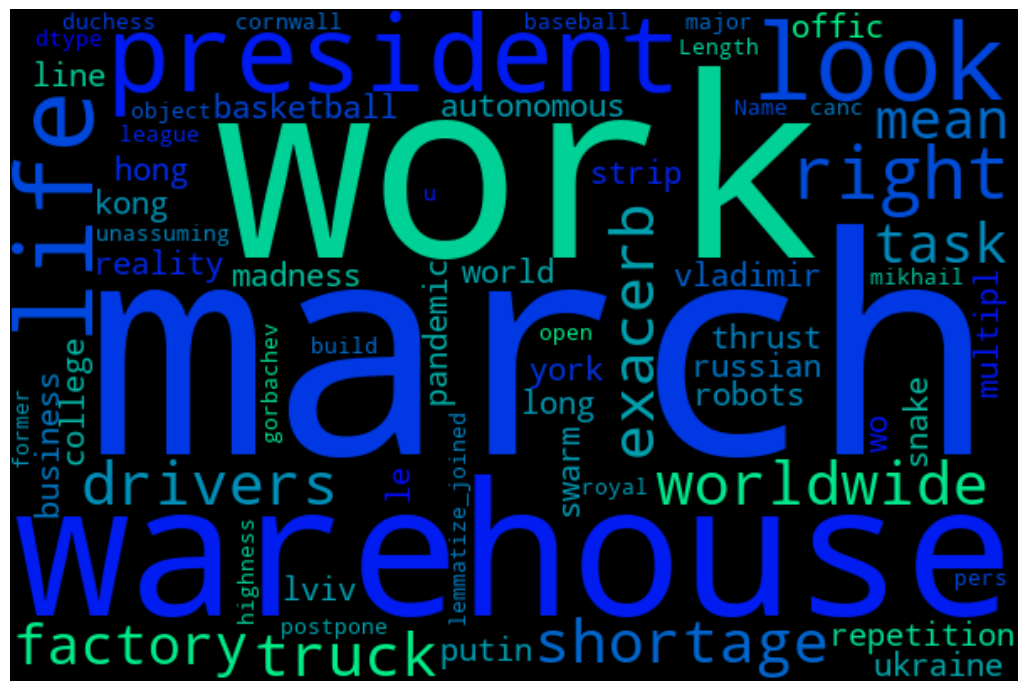

In [16]:
# then we can plot the wordcloud of the lemmatized word in order to have a view on their occurence
cloud=WordCloud(colormap="winter",width=600,height=400).generate(str(cnn_news["lemmatize_joined"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

we can plot again the distribution of word per document after cleaning up to see how it looks

/var/folders/kk/hpd_zqw54y51xszlkdtdntxh0000gn/T/ipykernel_59503/1618129336.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cnn_news['Number_of_words_for_cleaned'],kde = False, color= "navy", bins = 100)


Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted after removing stopwords and lemmatization')

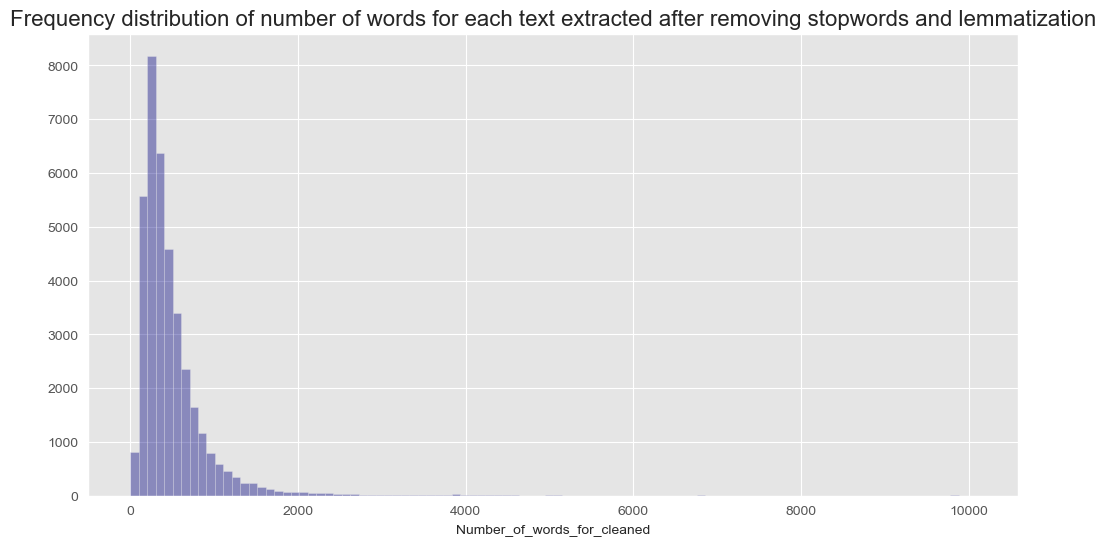

In [17]:
#Count for the actual number of words
cnn_news['Number_of_words_for_cleaned'] = cnn_news['lemmatize_joined'].apply(lambda x:len(str(x).split()))

#plot
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(cnn_news['Number_of_words_for_cleaned'],kde = False, color= "navy", bins = 100)
plt.title("Frequency distribution of number of words for each text extracted after removing stopwords and lemmatization", size=16)

Here we've got an error when we tried to use the "lemmatize_joined" for the bag of word, because to create a the dictionnary of word , the bag-of-word algorith (doc2bow) expects an array of unicode tokens on input, not a single string


In [ ]:
# use bag of words
tokens = cnn_news["lemmatize_joined"].apply(lambda x: nltk.word_tokenize(x))
dictionary = corpora.Dictionary(tokens)
cnn_news_corpus = [dictionary.doc2bow(doc) for doc in tokens]

#show result
cnn_news_corpus

### LDA modeling on the archived news articles

In [19]:
LDA = gensim.models.ldamodel.LdaModel

#initialize parameters values
number_topics = 40
number_itteration =10
# Build LDA model

lda_model = LDA(corpus = cnn_news_corpus, id2word=dictionary ,num_topics=number_topics,
                random_state = 100, passes=number_itteration)
#lda_model.print_topics()

for idx,topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.046*"race" + 0.016*"season" + 0.014*"champion" + 0.012*"hamilton" + 0.012*"team" + 0.011*"second" + 0.011*"formula" + 0.010*"grand" + 0.010*"first" + 0.009*"title"


Topic: 1 
Words: 0.039*"million" + 0.014*"money" + 0.012*"year" + 0.012*"billion" + 0.012*"company" + 0.011*"say" + 0.009*"fund" + 0.009*"accord" + 0.008*"financial" + 0.008*"market"


Topic: 2 
Words: 0.028*"build" + 0.019*"rescue" + 0.017*"box" + 0.014*"search" + 0.013*"collapse" + 0.013*"tower" + 0.012*"kyrgios" + 0.012*"disaster" + 0.011*"deadly" + 0.011*"costa"


Topic: 3 
Words: 0.060*"trump" + 0.043*"president" + 0.018*"biden" + 0.017*"state" + 0.014*"house" + 0.014*"donald" + 0.011*"white" + 0.010*"election" + 0.009*"former" + 0.008*"vote"


Topic: 4 
Words: 0.033*"people" + 0.033*"die" + 0.030*"lose" + 0.017*"film" + 0.016*"assange" + 0.012*"sweden" + 0.010*"award" + 0.009*"swedish" + 0.009*"star" + 0.009*"music"


Topic: 5 
Words: 0.021*"world" + 0.019*"sport" + 0.013*"team" + 0.012*"year" + 0.

#### Coherence score for the LDA

In [20]:
coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5519522211205817


#### Wordcloud per topic  for the LDA

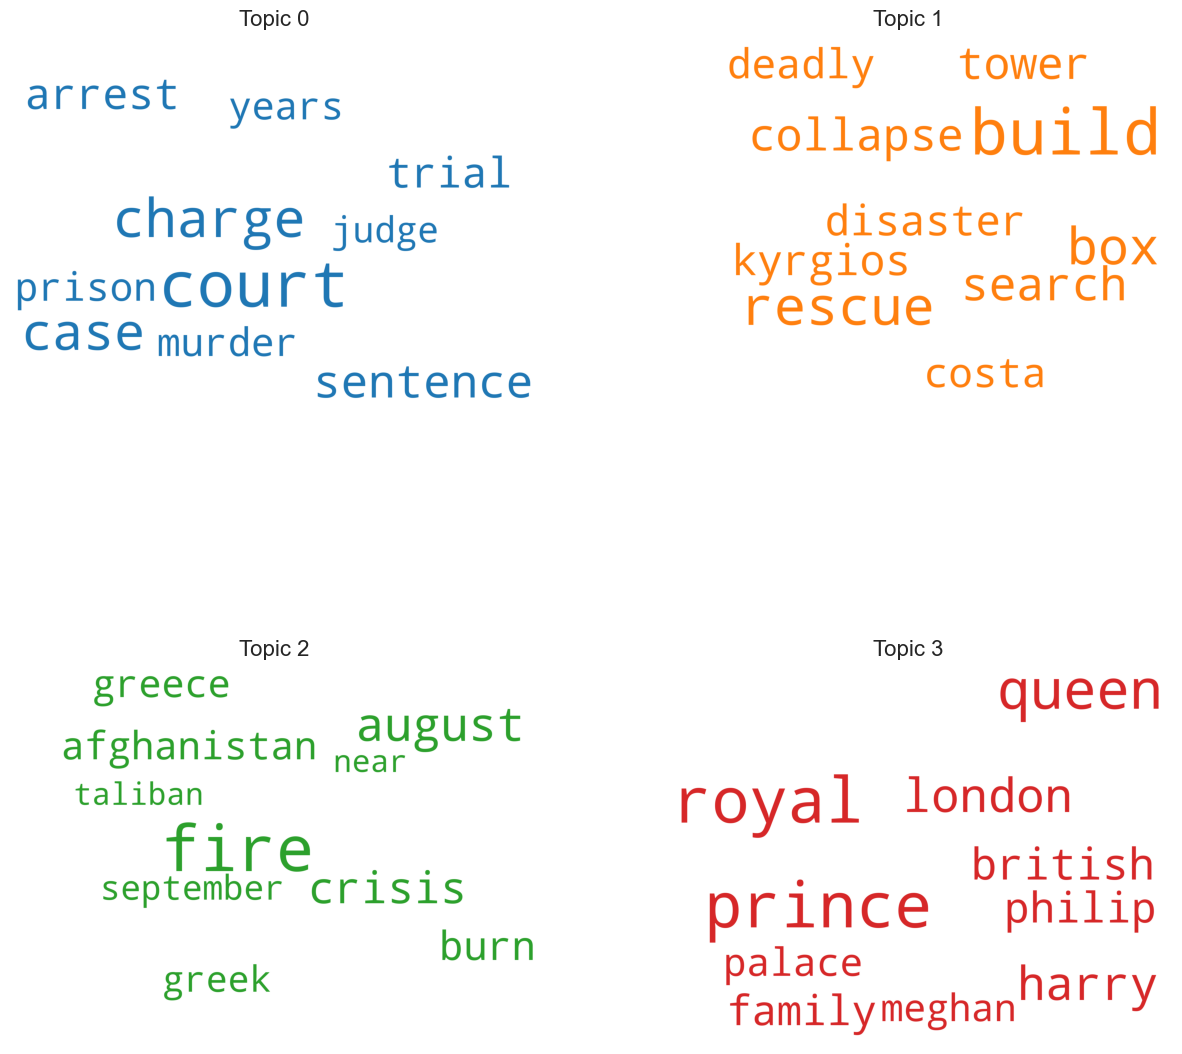

In [21]:

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

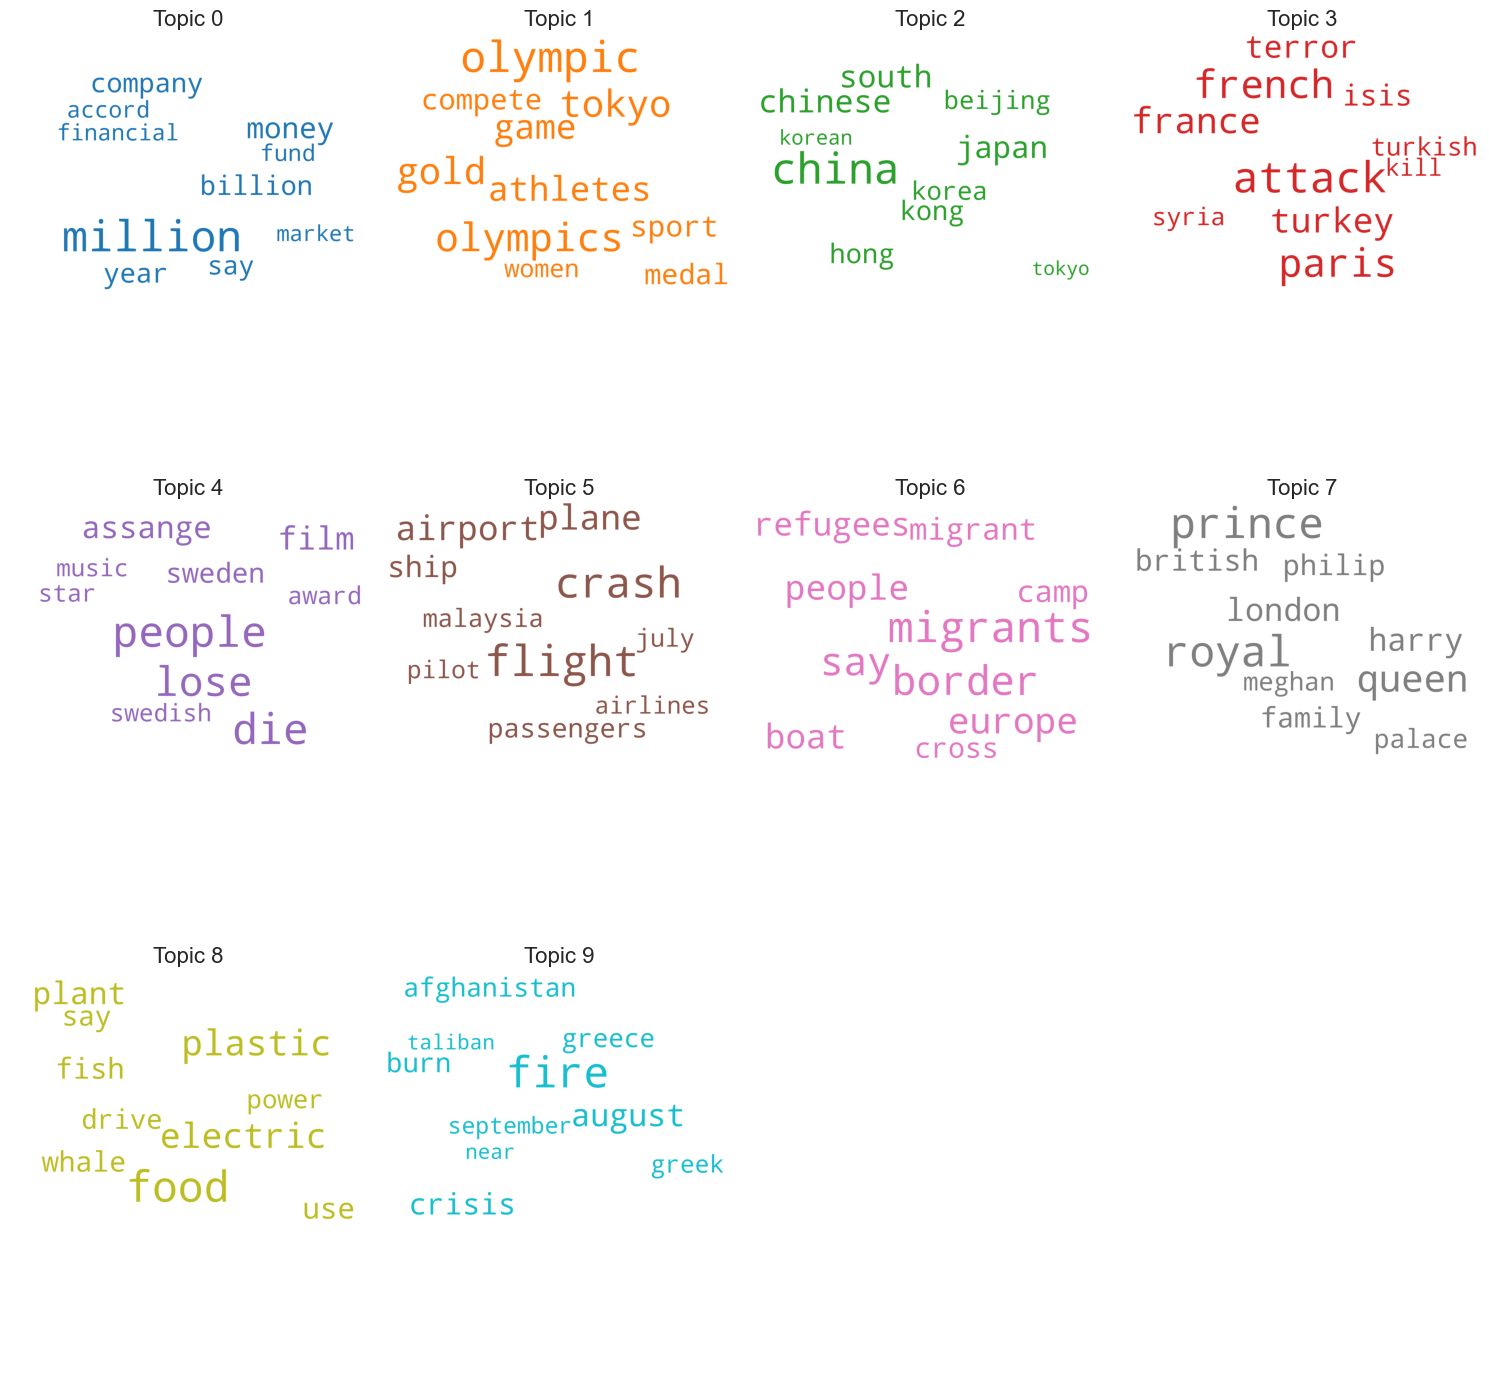

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Assuming 'lda_model' is your LDA model with 40 topics
topics = lda_model.show_topics(formatted=False)

# Define colors for each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

# Determine the number of topics in your model
num_topics = len(topics)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_topics // 4) + (1 if num_topics % 4 != 0 else 0)
num_cols = min(num_topics, 4)

# Create subplots based on the calculated rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), sharex=True, sharey=True)

# Flatten the axes for iteration
axes = axes.flatten()

# Iterate through topics and subplots
for i, ax in enumerate(axes):
    # Check if the current topic index is within the actual number of topics
    if i < num_topics:
        topic_words = dict(topics[i][1])
        
        # Create a WordCloud for each topic
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        
        # Plot the WordCloud on the current subplot
        ax.imshow(cloud)
        ax.set_title('Topic ' + str(i), fontdict=dict(size=16))
        ax.axis('off')
    else:
        # If there are more subplots than topics, hide the empty subplots
        ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## Data importation and pre-processing for ties series data
For the time series data, I chose to use SP500 one mminute data. I covered the period from 2019 to 2022 because on the articles distribution It's the period that concentrated the most released news article.

#### Data importation

In [23]:
sp19 = pd.read_csv("/Users/berichzinsou-daho/Documents/AMSE/MAG3/advanced_machine_learning/SP500 times series/SPXJp2019.csv" , sep=";")
sp20 = pd.read_csv("/Users/berichzinsou-daho/Documents/AMSE/MAG3/advanced_machine_learning/SP500 times series/SPXJp2020.csv" , sep=";")
sp21 = pd.read_csv("/Users/berichzinsou-daho/Documents/AMSE/MAG3/advanced_machine_learning/SP500 times series/SPXJp2021.csv" , sep=";")
sp22 = pd.read_csv("/Users/berichzinsou-daho/Documents/AMSE/MAG3/advanced_machine_learning/SP500 times series/SPXJp2022.csv" , sep=";")

In [24]:
sp19

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SPX,1,20190102,09:30:00,2476.96,2476.96,2470.40,2471.18,51
1,SPX,1,20190102,09:31:00,2470.98,2474.09,2470.80,2473.85,59
2,SPX,1,20190102,09:32:00,2473.70,2473.70,2471.26,2471.44,57
3,SPX,1,20190102,09:33:00,2471.30,2471.93,2469.64,2471.93,42
4,SPX,1,20190102,09:34:00,2471.88,2472.49,2470.11,2471.07,56
...,...,...,...,...,...,...,...,...,...
103831,SPX,1,20191231,16:01:00,3230.39,3230.49,3230.39,3230.49,11
103832,SPX,1,20191231,16:02:00,3230.50,3230.60,3230.50,3230.60,11
103833,SPX,1,20191231,16:03:00,3230.61,3230.70,3230.61,3230.70,9
103834,SPX,1,20191231,16:04:00,3230.71,3230.76,3230.71,3230.76,6


#### Pre-processing for time series data

In [25]:
#concatenate the database to have only one
spx_data = pd.concat([sp19,sp20,sp21,sp22],ignore_index=True)

In [26]:
#remove/drop useless columns
spx_data = spx_data.drop(["<TICKER>","<PER>", "<VOL>"],axis=1)# rename clearly the columns

# Rename columns
old_columns = spx_data.columns  #["<TICKER>","<DATE>", "<TIME>","<OPEN>" ,"<HIGH>","<LOW>","<CLOSE>"]
news_columns = ["DATE", "TIME","OPEN" ,"HIGH","LOW","CLOSE"]
columns_mapping = dict(zip(old_columns, news_columns))

# Rename the columns
spx_data = spx_data.rename(columns=columns_mapping)
spx_data.head()

,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,20190102,09:30:00,2476.96,2476.96,2470.40,2471.18
1,20190102,09:31:00,2470.98,2474.09,2470.80,2473.85
2,20190102,09:32:00,2473.70,2473.70,2471.26,2471.44
3,20190102,09:33:00,2471.30,2471.93,2469.64,2471.93
4,20190102,09:34:00,2471.88,2472.49,2470.11,2471.07


In [27]:
#define date type
spx_data["DATE"] = pd.to_datetime(spx_data["DATE"], format='%Y%m%d')

#extract only the date
spx_data["DATE"] =  pd.to_datetime(spx_data["DATE"]).dt.date

# define date type and extract the time
spx_data["TIME"] =  pd.to_datetime(spx_data["TIME"])
spx_data["TIME"] =  pd.to_datetime(spx_data["TIME"]).dt.time

#show the dataset
spx_data.head()

,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,2019-01-02,09:30:00,2476.96,2476.96,2470.40,2471.18
1,2019-01-02,09:31:00,2470.98,2474.09,2470.80,2473.85
2,2019-01-02,09:32:00,2473.70,2473.70,2471.26,2471.44
3,2019-01-02,09:33:00,2471.30,2471.93,2469.64,2471.93
4,2019-01-02,09:34:00,2471.88,2472.49,2470.11,2471.07


### Price change computation
By using the shift appproach , we choose to lose some lign in our data set which will not be issues for the analyse much important in our case.
we considere the price change 5min after the article has been pubished

In [28]:
# by using the shift appproach , we choose to lose ( lign in our data set which is not that much important in our case)
spx_data['price_change'] = ((spx_data['CLOSE'].shift(-5) - spx_data['CLOSE']) / spx_data['CLOSE']) * 100
spx_data


,DATE,TIME,OPEN,HIGH,LOW,CLOSE,price_change
0,2019-01-02,09:30:00,2476.96,2476.96,2470.40,2471.18,-0.099952
1,2019-01-02,09:31:00,2470.98,2474.09,2470.80,2473.85,-0.090951
2,2019-01-02,09:32:00,2473.70,2473.70,2471.26,2471.44,0.122196
3,2019-01-02,09:33:00,2471.30,2471.93,2469.64,2471.93,-0.023059
4,2019-01-02,09:34:00,2471.88,2472.49,2470.11,2471.07,0.088221
...,...,...,...,...,...,...,...
539200,2022-12-30,21:17:00,3839.50,3839.50,3839.50,3839.50,NaN
539201,2022-12-30,21:18:00,3839.50,3839.50,3839.50,3839.50,NaN
539202,2022-12-30,21:19:00,3839.50,3839.50,3839.50,3839.50,NaN
539203,2022-12-30,21:20:00,3839.50,3839.50,3839.50,3839.50,NaN


In [29]:
#check for NA and drop them.
spx_data.isna().sum()
spx_data= spx_data.dropna()
spx_data

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,price_change
0,2019-01-02,09:30:00,2476.96,2476.96,2470.40,2471.18,-0.099952
1,2019-01-02,09:31:00,2470.98,2474.09,2470.80,2473.85,-0.090951
2,2019-01-02,09:32:00,2473.70,2473.70,2471.26,2471.44,0.122196
3,2019-01-02,09:33:00,2471.30,2471.93,2469.64,2471.93,-0.023059
4,2019-01-02,09:34:00,2471.88,2472.49,2470.11,2471.07,0.088221
...,...,...,...,...,...,...,...
539195,2022-12-30,21:12:00,3839.50,3839.50,3839.50,3839.50,0.000000
539196,2022-12-30,21:13:00,3839.50,3839.50,3839.50,3839.50,0.000000
539197,2022-12-30,21:14:00,3839.50,3839.50,3839.50,3839.50,0.000000
539198,2022-12-30,21:15:00,3839.50,3839.50,3839.50,3839.50,0.000000


### prepare data for merging with the text data

In [30]:
# Combine 'DATE' and 'TIME' columns into a single datetime column
spx_data['datetime'] = pd.to_datetime(spx_data['DATE'].astype(str) + ' ' + spx_data['TIME'].astype(str))
spx_data

/var/folders/kk/hpd_zqw54y51xszlkdtdntxh0000gn/T/ipykernel_59503/1360972169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx_data['datetime'] = pd.to_datetime(spx_data['DATE'].astype(str) + ' ' + spx_data['TIME'].astype(str))


,DATE,TIME,OPEN,HIGH,LOW,CLOSE,price_change,datetime
0,2019-01-02,09:30:00,2476.96,2476.96,2470.40,2471.18,-0.099952,2019-01-02 09:30:00
1,2019-01-02,09:31:00,2470.98,2474.09,2470.80,2473.85,-0.090951,2019-01-02 09:31:00
2,2019-01-02,09:32:00,2473.70,2473.70,2471.26,2471.44,0.122196,2019-01-02 09:32:00
3,2019-01-02,09:33:00,2471.30,2471.93,2469.64,2471.93,-0.023059,2019-01-02 09:33:00
4,2019-01-02,09:34:00,2471.88,2472.49,2470.11,2471.07,0.088221,2019-01-02 09:34:00
...,...,...,...,...,...,...,...,...
539195,2022-12-30,21:12:00,3839.50,3839.50,3839.50,3839.50,0.000000,2022-12-30 21:12:00
539196,2022-12-30,21:13:00,3839.50,3839.50,3839.50,3839.50,0.000000,2022-12-30 21:13:00
539197,2022-12-30,21:14:00,3839.50,3839.50,3839.50,3839.50,0.000000,2022-12-30 21:14:00
539198,2022-12-30,21:15:00,3839.50,3839.50,3839.50,3839.50,0.000000,2022-12-30 21:15:00


In [31]:
#restrict the dataframes to usefull data
new_sp_data = spx_data[["datetime","price_change"]]
news_data = cnn_news[["Date published","lemmatize_joined"]]

In [32]:
#Merge DataFrames on the common column
merged_data = pd.merge(news_data, new_sp_data, left_on="Date published", right_on="datetime", how="inner")
merged_data
# Drop the duplicated datetime column, if needed
#merged_data = merged_data.drop("datetime", axis=1)

,Date published,lemmatize_joined,datetime,price_change
0,2022-02-17 14:03:00,russia olympic committee figure skater kamila ...,2022-02-17 14:03:00,-0.024494
1,2021-06-14 17:03:00,york business corporate america must compel fe...,2021-06-14 17:03:00,0.013697
2,2021-11-05 11:23:00,brandon steele second term republican west vir...,2021-11-05 11:23:00,-0.054548
3,2021-06-14 10:59:00,federal agency responsible oversee consumer pr...,2021-06-14 10:59:00,0.005659
4,2019-04-18 10:35:00,london business artificial intelligence softwa...,2019-04-18 10:35:00,-0.103955
...,...,...,...,...
125,2022-01-18 10:58:00,alexia putellas cement place best player women...,2022-01-18 10:58:00,0.062542
126,2022-01-14 12:38:00,memphis hottest team right grizzlies straight ...,2022-01-14 12:38:00,-0.129710
127,2022-01-06 16:25:00,novak djokovic treat like prisoner australian ...,2022-01-06 16:25:00,-0.018926
128,2022-02-16 16:18:00,eight gold medals grab wednesday beijing winte...,2022-02-16 16:18:00,-0.007429


### Prepare merged data for the FinLDA modeling

In [33]:
Finlda_data = merged_data.drop("datetime", axis=1)

#lda_data.index = range(1, len(lda_data) + 1)
#lda_data["lemmatized"] = lda_data["lemmatized"].astype(str)

### Tokens and bag-of-words

In [34]:
#final tokens
Fin_tokens =Finlda_data["lemmatize_joined"].apply(lambda x: nltk.word_tokenize(x))

# use bag of words
Fin_dictionary = corpora.Dictionary(Fin_tokens)
Fin_corpus = [Fin_dictionary.doc2bow(doc) for doc in Fin_tokens]
Fin_dictionary

### Matching between price change and published news articles
we add the price change data to the vectorized corpus we've got from the bag-of-words

In [ ]:
combined_corpus = []
for i, doc_bow in enumerate(Fin_corpus):
    # Append the numerical feature (price_change) to the document's bag-of-words representation
    # Use the timestamp as a unique identifier for the document
    doc_combined = doc_bow + [(len(Fin_corpus) + i, Finlda_data['price_change'][i])]
    combined_corpus.append(doc_combined)
combined_corpus

### FinLDA modeling

In [36]:
LDA = gensim.models.ldamodel.LdaModel

#initialize parameters values
number_topics = 35
number_itteration =10

# Build LDA model
Finlda_model = LDA(corpus = combined_corpus, id2word=Fin_dictionary ,num_topics=number_topics,
                random_state = 42, passes=number_itteration)

#Finlda_model.print_topics()

for idx,topic in Finlda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.013*"commission" + 0.013*"house" + 0.012*"capitol" + 0.011*"committee" + 0.008*"attack" + 0.008*"security" + 0.007*"committees" + 0.007*"congressional" + 0.007*"january" + 0.006*"hear"


Topic: 1 
Words: 0.012*"say" + 0.009*"biden" + 0.009*"federal" + 0.008*"state" + 0.007*"make" + 0.006*"holmes" + 0.006*"court" + 0.006*"balwani" + 0.006*"laws" + 0.005*"president"


Topic: 2 
Words: 0.017*"maxwell" + 0.016*"say" + 0.014*"andrew" + 0.010*"prince" + 0.009*"giuffre" + 0.007*"workers" + 0.007*"darroch" + 0.006*"epstein" + 0.006*"case" + 0.006*"tell"


Topic: 3 
Words: 0.026*"would" + 0.015*"bill" + 0.014*"billion" + 0.014*"state" + 0.012*"house" + 0.008*"provide" + 0.008*"climate" + 0.008*"senate" + 0.007*"federal" + 0.006*"credit"


Topic: 4 
Words: 0.012*"time" + 0.011*"year" + 0.010*"say" + 0.008*"former" + 0.008*"clemens" + 0.008*"bond" + 0.007*"years" + 0.007*"hall" + 0.007*"ortiz" + 0.006*"court"


Topic: 5 
Words: 0.022*"say" + 0.017*"arrest" + 0.017*"police" + 0.

#### Coherence score for the model

In [37]:
coherence_model_Finlda = CoherenceModel(model=Finlda_model,
texts=Fin_tokens, dictionary=Fin_dictionary, coherence='c_v')
coherence_Finlda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_Finlda)


Coherence Score:  0.5519522211205817


### Wordcloud for per topic

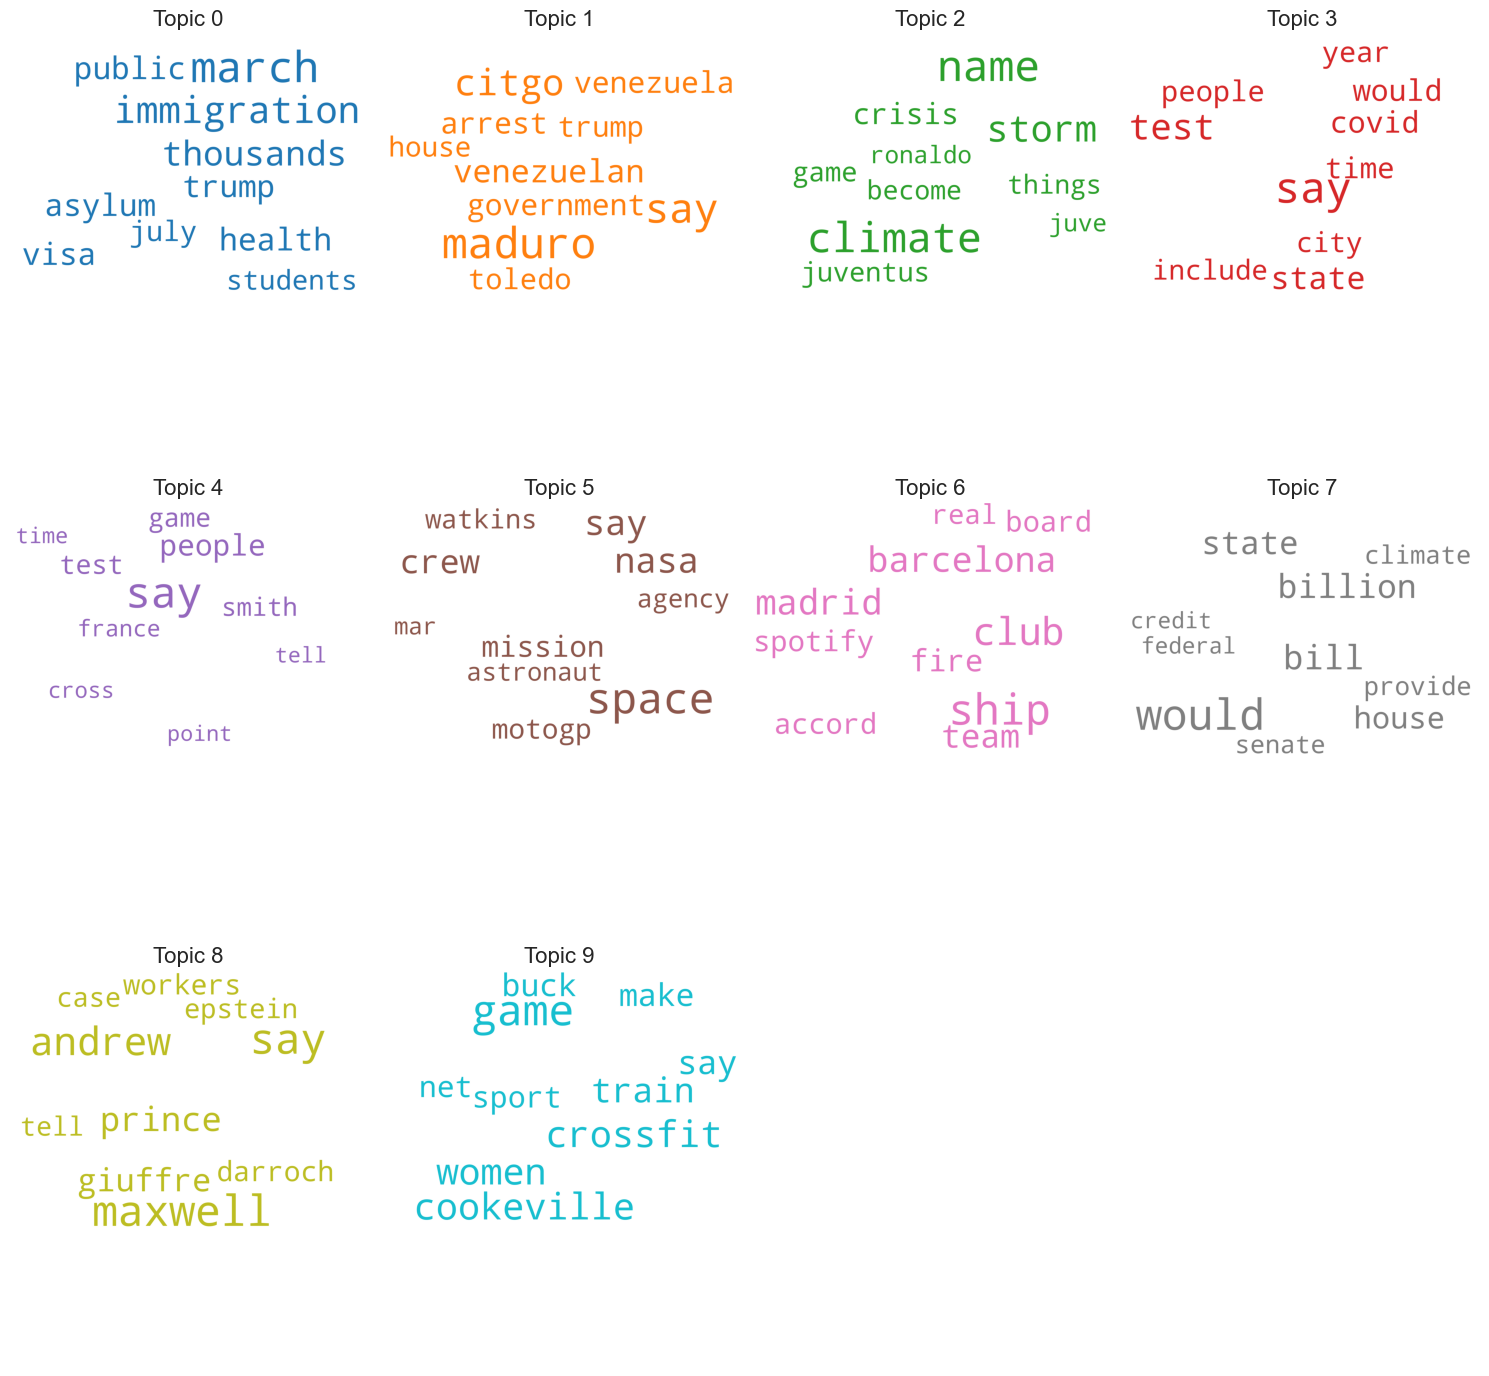

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# define an object for the topics
topics = Finlda_model.show_topics(formatted=False)

# Define colors for each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

# Determine the number of topics in your model
num_topics = len(topics)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_topics // 4) + (1 if num_topics % 4 != 0 else 0)
num_cols = min(num_topics, 4)

# Create subplots based on the calculated rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), sharex=True, sharey=True)

# Flatten the axes for iteration
axes = axes.flatten()

# Iterate through topics and subplots
for i, ax in enumerate(axes):
    
    # Check if the current topic index is within the actual number of topics
    if i < num_topics:
        topic_words = dict(topics[i][1])
        
        # Create a WordCloud for each topic
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        
        # Plot the WordCloud on the current subplot
        ax.imshow(cloud)
        ax.set_title('Topic ' + str(i), fontdict=dict(size=16))
        ax.axis('off')
    else:
        # If there are more subplots than topics, hide the empty subplots
        ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## Prediction with Machine Learning models
Here we've extracted from the LDA model the distribution of topic per document. The distribution of topic reprensent a feature that we will then use to estimate any king of machine learning model that we want.

In [ ]:
train_vecs = []
for i in range(len(Finlda_data)):
    top_topics = Finlda_model.get_document_topics(combined_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(35)]
    train_vecs.append(topic_vec)
train_vecs

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

set the ojbect for our features ( distribution of topic from each document) and for the target ( price change)

In [41]:
X = np.array(train_vecs)
y = np.array(Finlda_data["price_change"])

### Defining several evaluation functions for convenience

In [42]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])


## Linear regression

In [43]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target variable
target = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Train a regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
predictions = reg_model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, predictions)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(reg_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 0.11584297421216137
MSE: 0.0733260681741213
RMSE: 0.27078786563308427
R2 Score: 0.0027311732751812423
------------------------------
RMSE Cross-Validation: 2.1157072588694144


## support vector regression

In [44]:

# Train a support vector regression model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svm_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 0.11317366243926866
MSE: 0.07641292613703655
RMSE: 0.27642888079402367
R2 Score: -0.03925153895251632
------------------------------
RMSE Cross-Validation: 0.1684006265667117


In [45]:
spx_data

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,price_change,datetime
0,2019-01-02,09:30:00,2476.96,2476.96,2470.40,2471.18,-0.099952,2019-01-02 09:30:00
1,2019-01-02,09:31:00,2470.98,2474.09,2470.80,2473.85,-0.090951,2019-01-02 09:31:00
2,2019-01-02,09:32:00,2473.70,2473.70,2471.26,2471.44,0.122196,2019-01-02 09:32:00
3,2019-01-02,09:33:00,2471.30,2471.93,2469.64,2471.93,-0.023059,2019-01-02 09:33:00
4,2019-01-02,09:34:00,2471.88,2472.49,2470.11,2471.07,0.088221,2019-01-02 09:34:00
...,...,...,...,...,...,...,...,...
539195,2022-12-30,21:12:00,3839.50,3839.50,3839.50,3839.50,0.000000,2022-12-30 21:12:00
539196,2022-12-30,21:13:00,3839.50,3839.50,3839.50,3839.50,0.000000,2022-12-30 21:13:00
539197,2022-12-30,21:14:00,3839.50,3839.50,3839.50,3839.50,0.000000,2022-12-30 21:14:00
539198,2022-12-30,21:15:00,3839.50,3839.50,3839.50,3839.50,0.000000,2022-12-30 21:15:00


### Prediction on the SP500 without the feature from the FinLDA

##### Linear regresssion 
But at first we set the coresponding dataframe using all the observation we got for the series.
Further we'll do it for the observation that correspond to what we use for the FinLDA

In [46]:
X_sp = spx_data[["OPEN","HIGH","LOW","CLOSE"]]
#X_p = np.array(X_prime)
y_sp = spx_data["price_change"]

In [47]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target variable
target = y_sp

# Split the data into training and testing sets
X_sptrain, X_sptest, y_sptrain, y_sptest = train_test_split(X_sp, target, test_size=0.2, random_state=42)

# Train a regression model
reg_model1 = LinearRegression()
reg_model1.fit(X_sptrain, y_sptrain)

# Make predictions
sp_predictions = reg_model1.predict(X_sptest)

# Evaluate the model
#mse = mean_squared_error(y_test, predictions)

mae, mse, rmse, r_squared = evaluation(y_sptest, sp_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(reg_model1)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 0.07595318592014663
MSE: 0.022113711786648917
RMSE: 0.14870679805122872
R2 Score: 0.0002957326916069869
------------------------------
RMSE Cross-Validation: 2.1157072588694144


# Train a support vector regression model
svm_model1 = SVR()
svm_model1.fit(X_sptrain, y_sptrain)

# Make predictions
sp_predictions1 = svm_model1.predict(X_sptest)

mae, mse, rmse, r_squared = evaluation(y_sptest, sp_predictions1)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svm_model1)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


#### Prediction on the dataframe that corresponf to the observation we used for the FinLDA
Reset the dataframe first

In [48]:
#restrict the dataframes to usefull data
n_sp_data = spx_data[["datetime","price_change","OPEN","HIGH","LOW","CLOSE"]]
n_data = cnn_news[["Date published","lemmatize_joined"]]

new_finLDA_data = pd.merge(n_data, n_sp_data, left_on="Date published", right_on="datetime", how="inner")
new_finLDA_data

,Date published,lemmatize_joined,datetime,price_change,OPEN,HIGH,LOW,CLOSE
0,2022-02-17 14:03:00,russia olympic committee figure skater kamila ...,2022-02-17 14:03:00,-0.024494,4409.21,4410.25,4409.18,4409.18
1,2021-06-14 17:03:00,york business corporate america must compel fe...,2021-06-14 17:03:00,0.013697,4234.93,4235.03,4234.39,4234.39
2,2021-11-05 11:23:00,brandon steele second term republican west vir...,2021-11-05 11:23:00,-0.054548,4712.36,4712.49,4711.41,4711.48
3,2021-06-14 10:59:00,federal agency responsible oversee consumer pr...,2021-06-14 10:59:00,0.005659,4240.19,4240.97,4240.19,4240.97
4,2019-04-18 10:35:00,london business artificial intelligence softwa...,2019-04-18 10:35:00,-0.103955,2894.73,2895.57,2894.24,2895.47
...,...,...,...,...,...,...,...,...
125,2022-01-18 10:58:00,alexia putellas cement place best player women...,2022-01-18 10:58:00,0.062542,4590.46,4590.76,4588.55,4588.94
126,2022-01-14 12:38:00,memphis hottest team right grizzlies straight ...,2022-01-14 12:38:00,-0.129710,4642.92,4643.18,4641.03,4641.11
127,2022-01-06 16:25:00,novak djokovic treat like prisoner australian ...,2022-01-06 16:25:00,-0.018926,4708.87,4708.91,4702.59,4702.59
128,2022-02-16 16:18:00,eight gold medals grab wednesday beijing winte...,2022-02-16 16:18:00,-0.007429,4445.29,4445.29,4442.03,4442.24


In [49]:
X_FinLDA_f = new_finLDA_data[["OPEN","HIGH","LOW","CLOSE","price_change"]]

y_p = X_FinLDA_f["price_change"]


#### Linear regression 

In [50]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target variable
target = y_p

# Split the data into training and testing sets
X_fintrain, X_fintest, y_fintrain, y_fintest = train_test_split(X_FinLDA_f, target, test_size=0.2, random_state=42)

# Train a regression model
reg_model_f = LinearRegression()
reg_model_f.fit(X_fintrain, y_fintrain)

# Make predictions
predictions_f = reg_model_f.predict(X_fintest)

# Evaluate the model
#mse = mean_squared_error(y_test, predictions)

mae, mse, rmse, r_squared = evaluation(y_fintest, predictions_f)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(reg_model_f)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 3.176011803978768e-15
MSE: 1.274396792425723e-29
RMSE: 3.569869454792042e-15
R2 Score: 1.0
------------------------------
RMSE Cross-Validation: 2.1157072588694144


#### Support vector regression (SVR)

In [51]:
# Train a support vector regression model
svm_model_f1 = SVR()
svm_model_f1.fit(X_fintrain, y_fintrain)

# Make predictions
predictions_f1 = svm_model_f1.predict(X_fintest)

mae, mse, rmse, r_squared = evaluation(y_fintest, predictions_f1)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svm_model_f1)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 0.0991365423225991
MSE: 0.07740882164964277
RMSE: 0.278224408795567
R2 Score: -0.05279618377158535
------------------------------
RMSE Cross-Validation: 0.1684006265667117


#### We will procede to a dimension reduction with PCA on the vector we have got from the FinLDA
The goal here is to see how models will perform while using factor from PCA

### Standardize features from FinLDA

In [53]:
# 
mean = np.mean(train_vecs, axis=0)
std_dev = np.std(train_vecs, axis=0)
X_standardized = (train_vecs - mean) / std_dev

### Perfom PCA 
we got the explained variance in order to see the optimal number of component that explain most variability

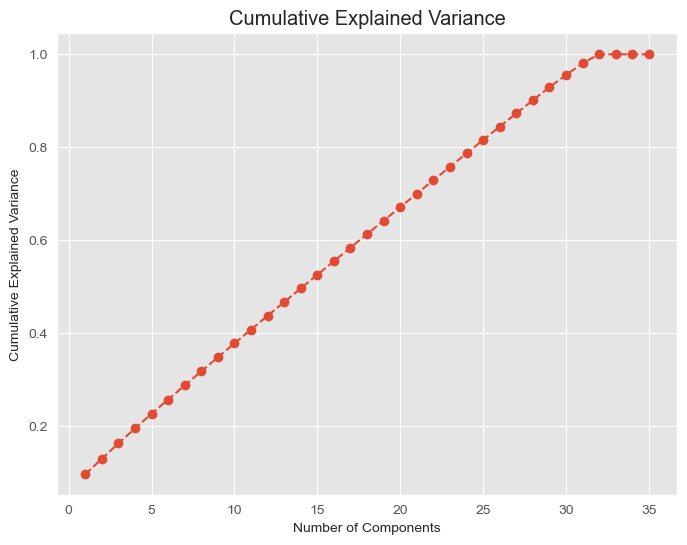

In [55]:
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

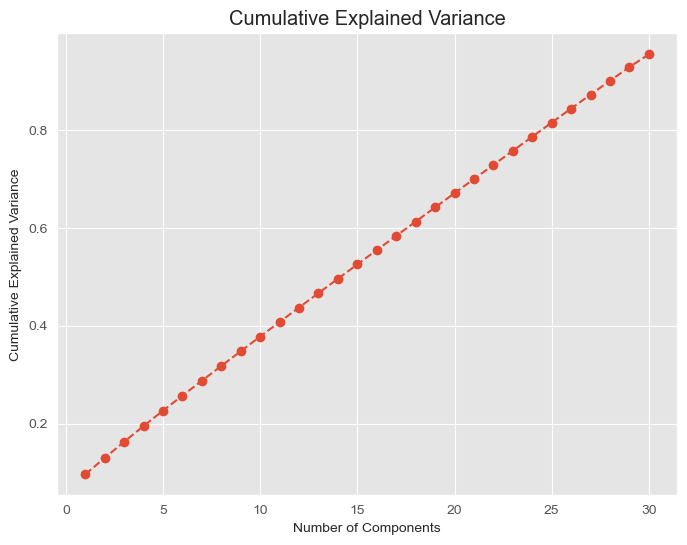

In [63]:
num_components = 30
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

# Visualize the data in the reduced dimensional space
explained_variance_ratio1 = pca.explained_variance_ratio_
cumulative_explained_variance1 = np.cumsum(explained_variance_ratio1)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio1) + 1), cumulative_explained_variance1, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Predictions with component got from PCA

In [64]:
X = np.array(X_pca)
y = np.array(Finlda_data["price_change"])

#### Linear regression

In [65]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target variable
target = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Train a regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
predictions = reg_model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, predictions)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(reg_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 0.11305661252020954
MSE: 0.07107009816863276
RMSE: 0.2665897563085138
R2 Score: 0.03341342061943409
------------------------------
RMSE Cross-Validation: 0.32690945445132485


#### SVR

In [66]:
# Train a support vector regression model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svm_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.11988792193043141
MSE: 0.07896849967877667
RMSE: 0.2810133443073063
R2 Score: -0.07400853453460887
------------------------------
RMSE Cross-Validation: 0.16641031411578588
